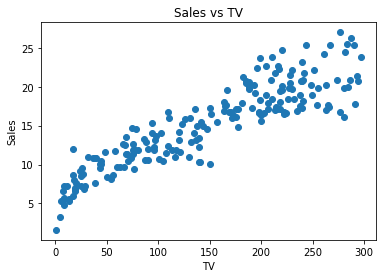

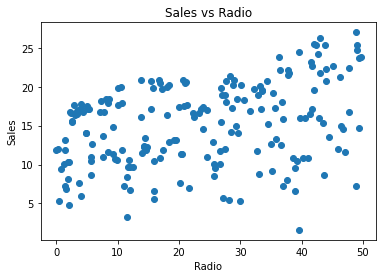

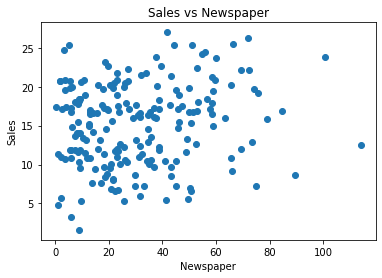

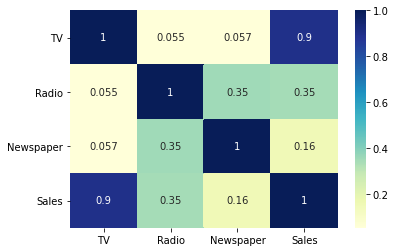

Mean square error:  3.6476276690392795
R2 score:  0.8730747825543774


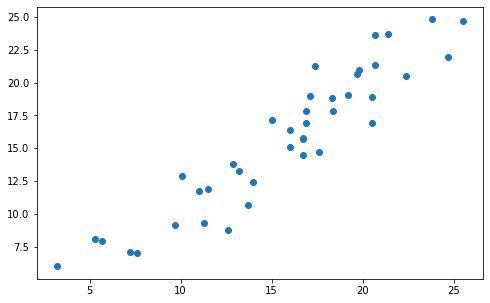

In [27]:
#Download advertising dataset from this link: https://www.kaggle.com/datasets/ashydv/advertising-dataset/data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data=pd.read_csv('advertising.csv')
data.describe()

data.isnull().sum()
data.dropna()

plt.scatter(data['TV'],data['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV')
plt.show()

plt.scatter(data['Radio'],data['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Sales vs Radio')
plt.show()

plt.scatter(data['Newspaper'],data['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Sales vs Newspaper')
plt.show()

mtx = data.corr()
sns.heatmap(mtx, cmap="YlGnBu", annot=True)
plt.show()

x=data[['TV','Radio','Newspaper']]
y=data['Sales']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=43)

model=LinearRegression()
model.fit(xtrain,ytrain)
prediction=model.predict(xtest)

m=mean_squared_error(ytest,prediction)
print("Mean square error: ",m)

r2=r2_score(ytest,prediction)
print("R2 score: ",r2)

plt.figure(figsize=(8,5))
plt.scatter(ytest,prediction)

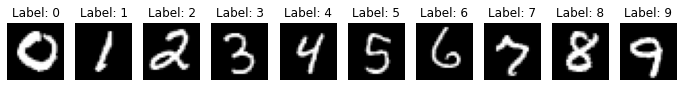

Model Accuracy: 95.55%


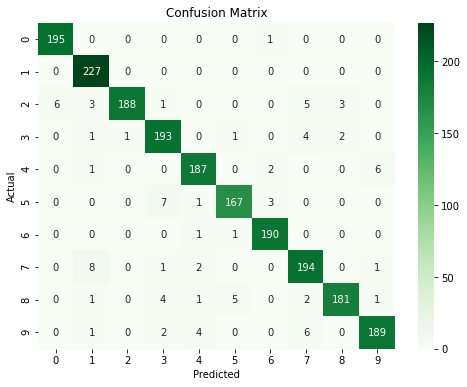

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       196
           1       0.94      1.00      0.97       227
           2       0.99      0.91      0.95       206
           3       0.93      0.96      0.94       202
           4       0.95      0.95      0.95       196
           5       0.96      0.94      0.95       178
           6       0.97      0.99      0.98       192
           7       0.92      0.94      0.93       206
           8       0.97      0.93      0.95       195
           9       0.96      0.94      0.95       202

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [39]:
#data can be downloaded in csv from here: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv("mnist_test.csv")

X = df.iloc[:, 1:].values 
y = df.iloc[:, 0].values 

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def plot_sample_images(X, y):
    fig, axes = plt.subplots(1, 10, figsize=(12, 3))
    for digit in range(10):
        index = np.where(y == digit)[0][0] 
        axes[digit].imshow(X[index].reshape(28, 28), cmap="gray")
        axes[digit].set_title(f"Label: {digit}")
        axes[digit].axis("off")

plot_sample_images(X_train, y_train)
plt.show()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))